IL Top 10 - david 

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib
from matplotlib import pyplot as plt
pd.set_option('display.max_columns',None)
import seaborn as sns
from shapely.geometry import Point, Polygon

In [3]:
stores_2022 = pd.read_csv('/srv/data/my_shared_data_folder/rafi/2022_Business_Academic_QCQ_grocery.csv')
stores_2022.drop(['Unnamed: 0'],inplace=True,axis=1)
territories = ['PR', 'FM', 'MP', 'GU', 'VI', 'MH']
stores_2022 = stores_2022.drop(stores_2022[stores_2022['STATE'].isin(territories)].index)
stores_2022.head()

,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
0,GOMART,55 POSTAL PLZ,MORGANTOWN,WV,26508,7005.0,61.0,304,2,C,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,554110.0,ALTERNATIVE FUELS,NaN,NaN,NaN,NaN,NaN,NaN,2022,21303.0,13.0,2482.0,2,NaN,NaN,NaN,NaN,998372387,NaN,124929449.0,50.0,389500.0,E,I,998372387.0,NaN,7,11000.0,3.0,39.594376,-79.954437,P,34060.0,2.0,390.0,54061.0
1,7-ELEVEN,485 E MAIN ST,EL CENTRO,CA,92243,2619.0,25.0,760,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,6.0,1273.0,2,W,NaN,NaN,NaN,495660326,NaN,5863311.0,800.0,1272634.0,H,K,495660326.0,NaN,7,11400.0,3.0,32.792679,-115.536058,0,20940.0,2.0,0.0,6025.0
2,EL SOL MARKET,110 W MAIN ST,WESTMORLAND,CA,92281,NaN,25.0,760,2,B,C,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,5.0,1061.0,9,NaN,NaN,NaN,NaN,519605455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,10200.0,1.0,33.051800,-115.581800,X,20940.0,2.0,0.0,6025.0
3,COOL SPRINGS GROCERY,241 WILDWOOD ST,MORGANTOWN,WV,26505,3141.0,61.0,304,2,A,A,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,2.0,382.0,9,NaN,NaN,NaN,NaN,817953730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,10400.0,4.0,39.652885,-79.986398,P,34060.0,2.0,390.0,54061.0
4,CIRCLE K,123 E MAIN ST,WESTMORLAND,CA,92281,NaN,25.0,760,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,6.0,1273.0,2,F,NaN,NaN,NaN,855113817,NaN,450720289.0,650.0,4981020.0,H,J,NaN,NaN,3,10200.0,1.0,33.051800,-115.581800,X,20940.0,2.0,0.0,6025.0


In [4]:
grocery_sic = stores_2022.loc[stores_2022[['PRIMARY SIC CODE', 'SIC CODE', 'SIC CODE 1', 'SIC CODE 2', 'SIC CODE 3', 'SIC CODE 4']].astype(str).apply(lambda x: x.str.startswith('5411')).any(axis=1)]
grocery_sic.head()

,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
0,GOMART,55 POSTAL PLZ,MORGANTOWN,WV,26508,7005.0,61.0,304,2,C,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,554110.0,ALTERNATIVE FUELS,NaN,NaN,NaN,NaN,NaN,NaN,2022,21303.0,13.0,2482.0,2,NaN,NaN,NaN,NaN,998372387,NaN,124929449.0,50.0,389500.0,E,I,998372387.0,NaN,7,11000.0,3.0,39.594376,-79.954437,P,34060.0,2.0,390.0,54061.0
1,7-ELEVEN,485 E MAIN ST,EL CENTRO,CA,92243,2619.0,25.0,760,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,6.0,1273.0,2,W,NaN,NaN,NaN,495660326,NaN,5863311.0,800.0,1272634.0,H,K,495660326.0,NaN,7,11400.0,3.0,32.792679,-115.536058,0,20940.0,2.0,0.0,6025.0
2,EL SOL MARKET,110 W MAIN ST,WESTMORLAND,CA,92281,NaN,25.0,760,2,B,C,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,5.0,1061.0,9,NaN,NaN,NaN,NaN,519605455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,10200.0,1.0,33.051800,-115.581800,X,20940.0,2.0,0.0,6025.0
3,COOL SPRINGS GROCERY,241 WILDWOOD ST,MORGANTOWN,WV,26505,3141.0,61.0,304,2,A,A,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,2.0,382.0,9,NaN,NaN,NaN,NaN,817953730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,10400.0,4.0,39.652885,-79.986398,P,34060.0,2.0,390.0,54061.0
4,CIRCLE K,123 E MAIN ST,WESTMORLAND,CA,92281,NaN,25.0,760,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,6.0,1273.0,2,F,NaN,NaN,NaN,855113817,NaN,450720289.0,650.0,4981020.0,H,J,NaN,NaN,3,10200.0,1.0,33.051800,-115.581800,X,20940.0,2.0,0.0,6025.0


In [8]:
grocery_t10_22 = grocery_sic.groupby('PARENT NUMBER', dropna=False).size().reset_index(name='COUNT')
grocery_t10_22.sort_values('COUNT', ascending=False, inplace=True)


other_row = grocery_t10_22.iloc[10:]
other_column = other_row['COUNT'].sum()


grocery_t10_22 = grocery_t10_22.iloc[:10]
grocery_t10_22.loc[len(grocery_t10_22)] = ["Other", other_column]
grocery_t10_22['PARENT NUMBER'] = grocery_t10_22['PARENT NUMBER'].astype(str)
grocery_t10_22['Percent'] = grocery_t10_22['COUNT'] / len(grocery_sic) * 100
grocery_t10_22

,PARENT NUMBER,COUNT,Percent
1067,nan,77818,49.287773
78,5863311.0,11939,7.561833
585,450720289.0,6814,4.315799
81,5889993.0,4397,2.784938
92,7521503.0,3574,2.263673
574,441412723.0,2499,1.582798
84,5995907.0,2493,1.578997
263,200026573.0,2217,1.404187
281,238136725.0,2105,1.333249
843,714232249.0,1760,1.114735


In [12]:
gil=grocery_sic.query("STATE == 'IL'")
gil

,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,...,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
13,KROGER,301 E MCKINLEY RD,OTTAWA,IL,61350,4805.0,99.0,815,2,E,...,7,963500.0,1.0,41.323858,-88.836271,P,36837.0,1.0,176.0,17099.0
86,CIRCLE K,290 MAIN ST,MARSEILLES,IL,61341,NaN,99.0,815,2,C,...,5,962400.0,2.0,41.333000,-88.701000,X,36837.0,1.0,176.0,17099.0
199,SPRING VALLEY SUPERMARKET,117 S SPALDING ST,SPRING VALLEY,IL,61362,2097.0,11.0,815,2,E,...,5,965200.0,2.0,41.323951,-89.199282,P,36837.0,1.0,176.0,17011.0
238,FREEDOM OIL CO,402 N MAIN ST,TOLUCA,IL,61369,9025.0,123.0,815,2,B,...,3,961500.0,2.0,41.005092,-89.133807,P,37900.0,2.0,0.0,17123.0
316,SENECA FOOD MART,271 S MAIN ST,SENECA,IL,61360,9415.0,99.0,815,2,B,...,4,963700.0,1.0,41.306622,-88.610207,P,36837.0,1.0,176.0,17099.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203321,AL A CARTE FOOD,2620 W CERMAK RD,CHICAGO,IL,60608,6171.0,31.0,773,2,A,...,8,840700.0,3.0,41.852085,-87.691277,4,16980.0,2.0,176.0,17031.0
203333,LAKEVIEW FOODS INC,4106 N SHERIDAN RD,CHICAGO,IL,60613,2007.0,31.0,773,2,B,...,7,32100.0,3.0,41.956971,-87.654794,P,16980.0,2.0,176.0,17031.0
203352,THORNDALE MART INC,1104 W THORNDALE AVE,CHICAGO,IL,60660,3516.0,31.0,773,2,A,...,7,30101.0,1.0,41.990189,-87.658514,P,16980.0,2.0,176.0,17031.0
203353,SMITH & SMITH,S CHICAGO,CHICAGO,IL,60641,NaN,31.0,773,2,A,...,8,831700.0,1.0,41.948300,-87.743900,X,16980.0,2.0,176.0,17031.0


In [5]:
grocery_t10_22 = grocery_sic.groupby('PARENT NUMBER', dropna=False).size().reset_index(name='COUNT')
grocery_t10_22.sort_values('COUNT', ascending=False, inplace=True)
grocery_t10_22.reset_index(drop=True,inplace=True)
# Create other row
other_row = grocery_t10_22.iloc[11:]
other_column = other_row['COUNT'].sum()
# Remove other rows
grocery_t10_22 = grocery_t10_22.iloc[:11]
grocery_t10_22.loc[len(grocery_t10_22)] = ["Other", other_column]
grocery_t10_22['PARENT NUMBER'] = grocery_t10_22['PARENT NUMBER'].astype(str)
grocery_t10_22['Percent'] = grocery_t10_22['COUNT'] / len(grocery_sic) * 100
grocery_t10_22.head(20)

,PARENT NUMBER,COUNT,Percent
0,nan,77818,49.287773
1,5863311.0,11939,7.561833
2,450720289.0,6814,4.315799
3,5889993.0,4397,2.784938
4,7521503.0,3574,2.263673
5,441412723.0,2499,1.582798
6,5995907.0,2493,1.578997
7,200026573.0,2217,1.404187
8,238136725.0,2105,1.333249
9,714232249.0,1760,1.114735


In [6]:

il = grocery_sic.loc[grocery_sic["STATE"] == 'IL']
il.loc[il["PARENT NUMBER"] == 238136725.0]


,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE


In [20]:


groc_il = il.groupby('PARENT NUMBER', dropna=False).count().reset_index()[['PARENT NUMBER','COMPANY']]
groc_il.sort_values('COMPANY', ascending=False, inplace=True)
groc_il.reset_index(drop=True,inplace=True)

groc_tp10_il = groc_il.iloc[:12]
other_groc = groc_il['COMPANY'].sum() - groc_tp10_il['COMPANY'].sum()

# groc_tp10_il.iloc[12, :] = {'PARENT NUMBER': 'Other', 'COMPANY': other_groc}

groc_tp10_il.loc[len(groc_tp10_il.index)] = ["Other", other_groc]
groc_tp10_il['PARENT NUMBER'] = groc_tp10_il['PARENT NUMBER'].astype(str)
groc_tp10_il.loc[:, 'Percent'] = groc_tp10_il.loc[:, 'COMPANY'] / len(il) * 100
#len(il)
groc_tp10_il.rename(columns={"COMPANY":"COUNT"})
#il.head()


/tmp/ipykernel_721288/2729916231.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groc_tp10_il.loc[len(groc_tp10_il.index)] = ["Other", other_groc]
/tmp/ipykernel_721288/2729916231.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groc_tp10_il['PARENT NUMBER'] = groc_tp10_il['PARENT NUMBER'].astype(str)
/tmp/ipykernel_721288/2729916231.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

,PARENT NUMBER,COUNT,Percent
0,nan,2236,43.074552
1,441412723.0,525,10.113658
2,5863311.0,446,8.591793
3,450720289.0,329,6.337893
4,200026573.0,221,4.257369
5,5995907.0,189,3.640917
6,5889993.0,134,2.581391
7,7521503.0,122,2.350222
8,1490291.0,89,1.714506
9,723360636.0,68,1.309960


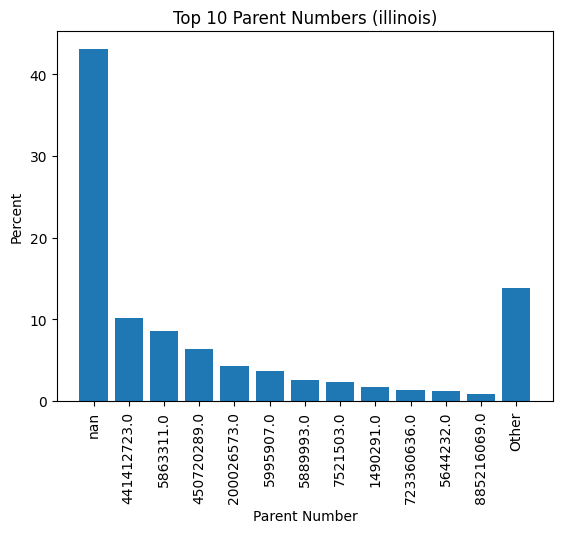

In [8]:
#top 10 parent ( Illinois) 

plt.bar(groc_tp10_il['PARENT NUMBER'], groc_tp10_il['Percent'])
plt.xlabel('Parent Number')
plt.ylabel('Percent')
plt.title('Top 10 Parent Numbers (illinois)')
plt.xticks(rotation=90)
plt.show()

In [13]:

IL_SIC1 = grocery_sic[(grocery_sic['PARENT NUMBER']== 441412723.0 ) & (grocery_sic['STATE'] == 'IL')]
IL_SIC1.tail()

# 1) 5863311.0 = parent company = Seven & I holdings 
# 2) 450720289.0 = parent company(s) = Alimentation Couche-Tard, Convenience Retail Asia
# 3) 5889993.0 = parent company = Walmart 
# 4) 7521503.0 = parent company = Kroger 
#5) 441412723.0 = parent company(s)= Rutters Holding Inc, CHR Corporation 
#6) 5995907.0 = parent company = Albertson, American stores 
#7) 200026573.0 = parent company = Albrecht Discounts(aldi)
#8) not showing data Ahold Delhaize
#9) 714232249.0 = parentt company = Clark Enterprises Inc
#10) 433922353.0 = parent compnay = Murphy Oil Corporation USA 


,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
197370,CASEY'S,111 W ILLINOIS ROUTE 64,LANARK,IL,61046,NaN,15.0,815,2,C,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,581222.0,PIZZA,554110.0,ALTERNATIVE FUELS,NaN,NaN,NaN,NaN,NaN,NaN,2022,21303.0,10.0,1599.0,2,9,NaN,NaN,NaN,716563524,398553685.0,441412723.0,400.0,12952594.0,G,H,NaN,NaN,4,960100.0,3.0,42.120100,-89.834800,X,0.0,NaN,0.0,17015.0
197509,CASEY'S,111 W NORTH ST,DAKOTA,IL,61018,2027.0,177.0,815,2,C,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,539901.0,GENERAL MERCHANDISE-RETAIL,581222.0,PIZZA,554110.0,ALTERNATIVE FUELS,NaN,NaN,2022,21303.0,10.0,1691.0,2,9,NaN,NaN,NaN,405820636,398553685.0,441412723.0,400.0,12952594.0,G,H,NaN,NaN,3,100.0,1.0,42.390547,-89.525706,P,23300.0,1.0,466.0,17177.0
197541,CASEY'S,1201 W ROCK FALLS RD,ROCK FALLS,IL,61071,2648.0,195.0,815,2,C,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,581222.0,PIZZA,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,11.0,1914.0,2,9,NaN,NaN,NaN,181345760,398553685.0,441412723.0,400.0,12952594.0,G,H,NaN,NaN,6,1700.0,2.0,41.770316,-89.705995,P,44580.0,1.0,221.0,17195.0
197890,CASEY'S,102 N OAK ST,ONARGA,IL,60955,1228.0,75.0,815,2,C,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,581222.0,PIZZA,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,10.0,1700.0,2,9,NaN,NaN,NaN,872763685,398553685.0,441412723.0,400.0,12952594.0,G,H,NaN,NaN,3,950600.0,2.0,40.714995,-88.006062,P,0.0,NaN,0.0,17075.0
198145,CASEY'S,300 E LOCUST ST,CHATSWORTH,IL,60921,NaN,105.0,815,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,581222.0,PIZZA,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,2022,21303.0,9.0,1478.0,2,9,NaN,NaN,NaN,400702546,398553685.0,441412723.0,400.0,12952594.0,G,H,NaN,NaN,3,961000.0,2.0,40.752900,-88.292500,X,38700.0,1.0,145.0,17105.0


In [15]:
IL_SIC3 = grocery_sic[(grocery_sic['PARENT NUMBER']== 5995907.0) & (grocery_sic['STATE'] == 'IL')]
IL_SIC3

,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
5161,JEWEL-OSCO,16 S WAUKEGAN RD,DEERFIELD,IL,60015,5216.0,31.0,847,2,E,G,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,546102.0,BAKERS-RETAIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,90.0,23000.0,2,M,NaN,NaN,NaN,306364910,23119.0,5995907.0,800.0,NaN,H,NaN,306364910.0,NaN,7,801500.0,1.0,42.151799,-87.837363,P,16980.0,2.0,176.0,17031.0
5279,JEWEL-OSCO,800 NORTHWEST HWY # 14,FOX RIVER GROVE,IL,60021,1208.0,111.0,847,2,F,H,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,591205.0,PHARMACIES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,200.0,51845.0,2,M,NaN,NaN,NaN,436738993,23119.0,5995907.0,800.0,NaN,H,NaN,436738993.0,NaN,5,871402.0,3.0,42.195350,-88.209897,P,16980.0,2.0,176.0,17111.0
6579,JEWEL-OSCO,345 S RAND RD,LAKE ZURICH,IL,60047,2271.0,97.0,847,2,F,H,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,591205.0,PHARMACIES,609910.0,MONEY TRANSFER SERVICE,804939.0,PHARMACISTS,NaN,NaN,NaN,NaN,2022,NaN,200.0,54846.0,2,M,NaN,NaN,NaN,705479853,23119.0,5995907.0,800.0,NaN,H,NaN,705479853.0,NaN,7,864408.0,3.0,42.191712,-88.110099,P,16980.0,2.0,176.0,17097.0
6690,JEWEL-OSCO,1340 PATRIOT BLVD,GLENVIEW,IL,60026,7777.0,31.0,847,2,F,H,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,200.0,51110.0,2,M,NaN,NaN,NaN,700233144,23119.0,5995907.0,800.0,NaN,H,NaN,700233144.0,NaN,6,802300.0,1.0,42.078560,-87.818822,P,16980.0,2.0,176.0,17031.0
8787,JEWEL-OSCO,2203 E OAKLAND AVE,BLOOMINGTON,IL,61701,5760.0,113.0,309,2,F,H,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,200.0,55562.0,2,M,NaN,NaN,NaN,427996134,23119.0,5995907.0,800.0,NaN,H,NaN,427996134.0,NaN,7,5800.0,1.0,40.472303,-88.960278,P,14010.0,2.0,145.0,17113.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199610,JEWEL-OSCO,370 N DESPLAINES ST,CHICAGO,IL,60661,1106.0,31.0,312,2,F,G,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,150.0,38333.0,2,M,NaN,NaN,NaN,643278203,23119.0,5995907.0,800.0,NaN,H,NaN,643278203.0,NaN,5,842300.0,2.0,41.888342,-87.645057,P,16980.0,2.0,176.0,17031.0
199798,JEWEL-OSCO,1763 W HOWARD ST,CHICAGO,IL,60626,1626.0,31.0,773,2,F,H,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,200.0,51110.0,2,M,NaN,NaN,NaN,705501147,23119.0,5995907.0,800.0,NaN,H,NaN,705501147.0,NaN,8,10202.0,1.0,42.019372,-87.675184,4,16980.0,2.0,176.0,17031.0
200464,JEWEL-OSCO,2520 N NARRAGANSETT AVE,CHICAGO,IL,60639,1041.0,31.0,773,2,F,H,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,200.0,51110.0,2,M,NaN,NaN,NaN,427743916,23119.0,5995907.0,800.0,NaN,H,Na

In [14]:
#FINDS IL top ten grocery stores. 
groc_il = il.groupby('PARENT NUMBER', dropna=False).count().reset_index()[['PARENT NUMBER','EMPLOYEE SIZE (5) - LOCATION']]
groc_il.sort_values('EMPLOYEE SIZE (5) - LOCATION', ascending=False, inplace=True)
groc_il.reset_index(drop=True,inplace=True)


#groc_tp10_il = groc_il.iloc[:12]
#other_groc = groc_il['EMPLOYEE SIZE (5) - LOCATION'].sum() - groc_tp10_il['EMPLOYEE SIZE (5) - LOCATION'].sum()

# groc_tp10_il.iloc[12, :] = {'PARENT NUMBER': 'Other', 'COMPANY': other_groc}

#groc_tp10_il.loc[len(groc_tp10_il.index)] = ["Other", other_groc]
#groc_tp10_il['PARENT NUMBER'] = groc_tp10_il['PARENT NUMBER'].astype(str)
#groc_tp10_il.loc[:, 'Percent'] = groc_tp10_il.loc[:, 'EMPLOYEE SIZE (5) - LOCATION'] / len(il) * 100
#len(il)
#groc_tp10_il
groc_il.head(10)

,PARENT NUMBER,EMPLOYEE SIZE (5) - LOCATION
0,NaN,2203
1,441412723.0,523
2,5863311.0,443
3,450720289.0,329
4,200026573.0,215
5,5995907.0,188
6,5889993.0,134
7,7521503.0,121
8,1490291.0,85
9,723360636.0,67


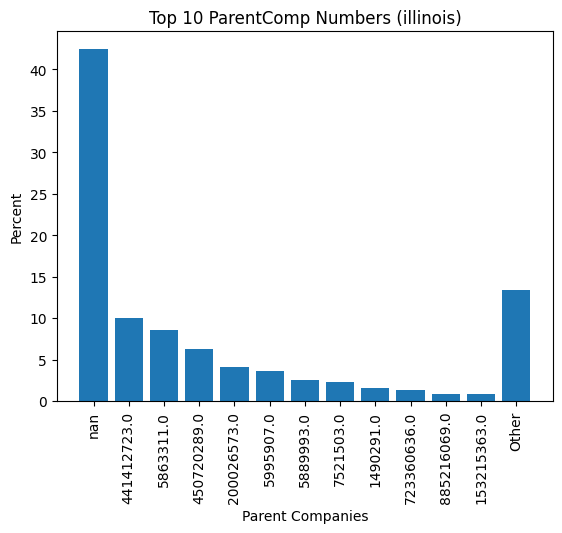

In [65]:
plt.bar(groc_tp10_il['PARENT NUMBER'], groc_tp10_il['Percent'])
plt.xlabel('Parent Companies')
plt.ylabel('Percent')
plt.title('Top 10 ParentComp Numbers (illinois)')
plt.xticks(rotation=90)
plt.show()

# parent company to illinois 
#1) 441412723.0 = parent company(s)= Rutters Holding Inc, CHR Corporation
#2) 5863311.0 = parent company = Seven & I holdings
#3) 450720289.0 = parent company(s) = Alimentation Couche-Tard, Convenience Retail Asia
#4) 200026573.0 = parent company = Albrecht Discounts(aldi)
#5) 5995907.0 = parent company = Albertson

In [ ]:
plt.bar(x, y)
plt.xlabel('Store')
plt.ylabel('Sales')
plt.title('Sales by Store')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show(